In [1]:
import tensorflow as tf
import tensorflow_hub as hub

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
model = hub.load('https://bit.ly/metrabs_l')  # Takes about 3 minutes

In [ ]:
# save_path = 'saved_model.pb'
# tf.saved_model.save(model, save_path)

In [82]:
img = tf.image.decode_image(tf.io.read_file('/kaggle/input/multi-person-skeleton-detection-image/image_4.jpeg'))
pred = model.detect_poses(img, skeleton='kinectv2_25')
pred['poses3d'].shape

TensorShape([6, 25, 3])

In [75]:
pred['boxes']

<tf.Tensor: shape=(6, 5), dtype=float32, numpy=
array([[718.06525   , 204.04095   , 127.87716   , 371.29428   ,
          0.9972689 ],
       [312.3525    , 142.16867   , 176.41656   , 433.45163   ,
          0.99674433],
       [882.48065   , 200.70543   , 120.59971   , 395.33728   ,
          0.99668133],
       [448.8712    , 140.07169   , 243.14282   , 586.55743   ,
          0.99478644],
       [157.51155   , 205.11066   , 150.3088    , 385.0495    ,
          0.9947138 ],
       [  1.1293544 , 205.00905   , 127.37869   , 398.2434    ,
          0.9933662 ]], dtype=float32)>

In [76]:
for i, (x, y, w, h, c) in enumerate(pred['boxes'].numpy()):
    print(i, "=>", x, y, w, h, c)

0 => 718.06525 204.04095 127.87716 371.29428 0.9972689
1 => 312.3525 142.16867 176.41656 433.45163 0.99674433
2 => 882.48065 200.70543 120.59971 395.33728 0.99668133
3 => 448.8712 140.07169 243.14282 586.55743 0.99478644
4 => 157.51155 205.11066 150.3088 385.0495 0.9947138
5 => 1.1293544 205.00905 127.37869 398.2434 0.9933662


# **Getting poses in 3d Co-ordinate Axis or Cartesian Plain**
* ### 3 => number of person detected
* ### 30 => number of joints or points on each image / frame
* ### 3 => 3d Co-ordinate axis(x, y and z)

In [77]:
pred['poses3d']

<tf.Tensor: shape=(6, 24, 3), dtype=float32, numpy=
array([[[ 1.06717261e+03,  2.53615627e+01,  5.21743457e+03],
        [ 1.12618872e+03,  1.17989220e+02,  5.20731641e+03],
        [ 1.01181677e+03,  1.16195541e+02,  5.24985742e+03],
        [ 1.07657935e+03, -9.16980515e+01,  5.24156738e+03],
        [ 1.21975269e+03,  4.91529297e+02,  5.15622461e+03],
        [ 8.95379517e+02,  4.87071289e+02,  5.29652246e+03],
        [ 1.07174683e+03, -2.38591309e+02,  5.21142041e+03],
        [ 1.26859106e+03,  8.94443970e+02,  5.21466553e+03],
        [ 8.84151489e+02,  8.88424622e+02,  5.39571924e+03],
        [ 1.06911426e+03, -2.95300476e+02,  5.18994531e+03],
        [ 1.28018713e+03,  9.51127930e+02,  5.08771143e+03],
        [ 7.90314087e+02,  9.54617798e+02,  5.31352295e+03],
        [ 1.09433826e+03, -5.19101562e+02,  5.19157031e+03],
        [ 1.15785632e+03, -4.07723785e+02,  5.17489941e+03],
        [ 1.01076941e+03, -4.24649261e+02,  5.22390381e+03],
        [ 1.09244897e+03, -5.9810

# **Getting poses in 2d Co-ordinate axis or Cartesian plain**
* ### 3 => number of person detected
* ### 30 => number of joints or points on each image / frame
* ### 2 => 2d Co-ordinate axis(x and y)

In [78]:
pred['poses2d']

<tf.Tensor: shape=(6, 24, 2), dtype=float32, numpy=
array([[[783.515   , 380.25302 ],
        [796.192   , 399.4849  ],
        [770.75616 , 398.917   ],
        [784.43713 , 356.0976  ],
        [818.1146  , 478.0075  ],
        [745.1674  , 474.36874 ],
        [784.72034 , 325.52884 ],
        [825.3695  , 560.34143 ],
        [739.56116 , 552.9186  ],
        [785.0919  , 313.51727 ],
        [834.39343 , 577.0077  ],
        [723.2168  , 569.13165 ],
        [790.2708  , 266.95563 ],
        [804.2682  , 289.8649  ],
        [771.5758  , 287.1612  ],
        [792.3609  , 249.15437 ],
        [825.42413 , 287.37808 ],
        [749.275   , 281.2387  ],
        [808.9987  , 325.781   ],
        [747.694   , 322.9689  ],
        [788.58234 , 288.38446 ],
        [767.1334  , 289.05118 ],
        [784.5578  , 276.89145 ],
        [770.4579  , 278.78668 ]],

       [[387.04184 , 361.5611  ],
        [399.0017  , 380.9366  ],
        [375.01773 , 382.31403 ],
        [383.55023 , 336.716

In [79]:
def plot_results(image, pred, joint_names, joint_edges):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Rectangle

    fig = plt.figure(figsize=(7, 6), dpi=300)

    # Rendering "Points and Connections" on Original Image
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    # Rendering "Points and Connections" in 3d plot
    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.2, wspace=0.1, hspace=0.1)
    plt.rcParams["figure.autolayout"] = True
    pose_ax.view_init(27, -78)

    pose_ax.set_xlim3d(-2000, 2000)
    pose_ax.set_zlim3d(-1200, 1200)
    pose_ax.set_ylim3d(3000, 5000)

    poses3d = pred['poses3d'].numpy()

    # Swapping the 2nd and 3rd dimension
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]

    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            print(i_start, i_end, "=>", *zip(pose2d[i_start], pose2d[i_end]))

            # Plotting joints/points on 2d Original Plot
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)

            # Plotting joints/points on 3d Plot
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)

        image_ax.scatter(*pose2d.T, s=8)
        pose_ax.scatter(*pose3d.T, s=0.01)

2 3 => (790.69934, 796.2404) (261.91034, 230.31718)
2 20 => (790.69934, 790.0698) (261.91034, 278.17975)
1 20 => (787.7352, 790.0698) (327.6792, 278.17975)
0 1 => (782.9238, 787.7352) (392.77603, 327.6792)
0 16 => (782.9238, 767.93396) (392.77603, 391.42368)
0 12 => (782.9238, 797.923) (392.77603, 394.4228)
16 17 => (767.93396, 747.74036) (391.42368, 464.40762)
12 13 => (797.923, 814.3565) (394.4228, 468.85385)
17 18 => (747.74036, 741.4289) (464.40762, 534.57764)
13 14 => (814.3565, 822.21045) (468.85385, 541.41394)
18 19 => (741.4289, 737.9009) (534.57764, 550.9312)
14 15 => (822.21045, 820.16876) (541.41394, 557.249)
8 20 => (752.57104, 790.0698) (282.6048, 278.17975)
4 20 => (823.73694, 790.0698) (289.16272, 278.17975)
8 9 => (752.57104, 745.12616) (282.6048, 317.05646)
4 5 => (823.73694, 812.2084) (289.16272, 320.04047)
9 10 => (745.12616, 761.7435) (317.05646, 293.7928)
5 6 => (812.2084, 791.04346) (320.04047, 292.88837)
10 24 => (761.7435, 766.7036) (293.7928, 283.90482)
6 22 =>

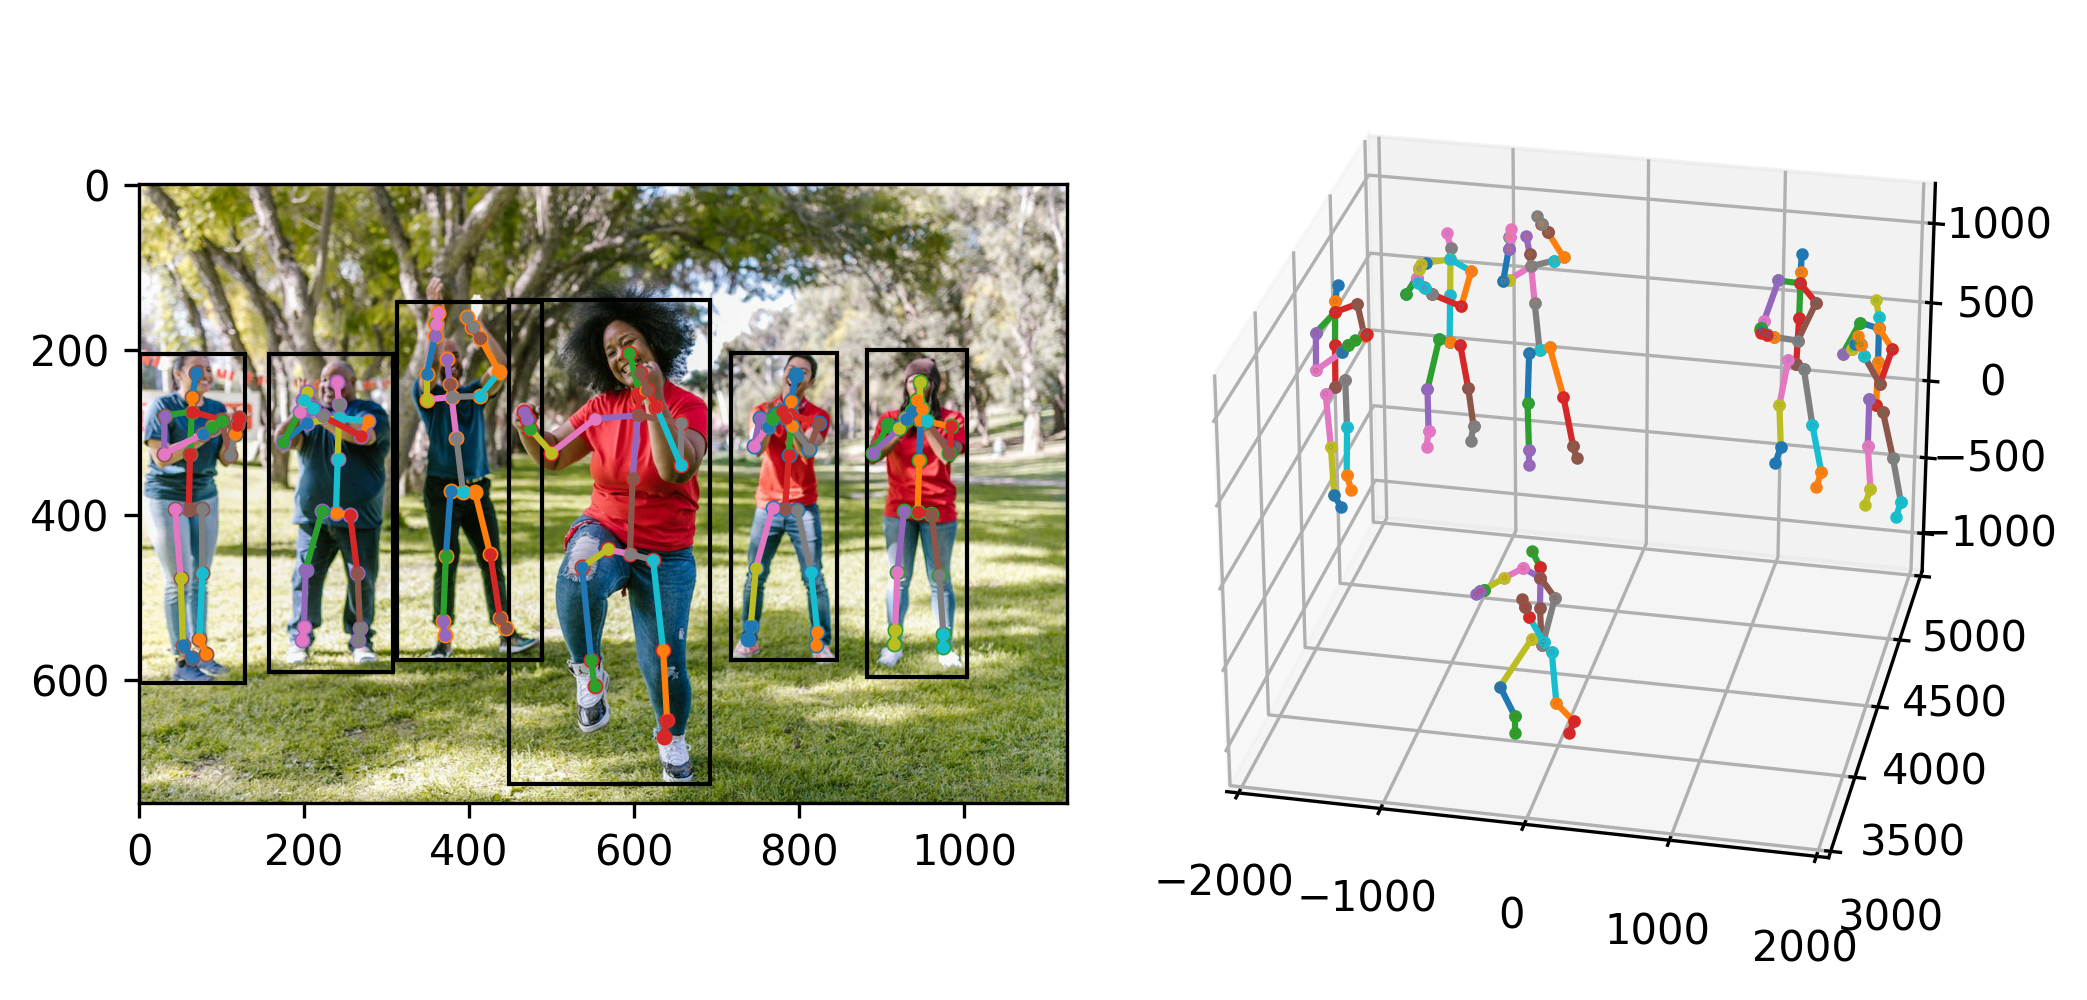

In [83]:
joint_names = model.per_skeleton_joint_names['kinectv2_25'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['kinectv2_25'].numpy()
plot_results(img, pred, joint_names, joint_edges)

# **Just simply looking at Joints and Edges of a Skeleton**

In [10]:
model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)

array(['pelv_smpl', 'lhip_smpl', 'rhip_smpl', 'bell_smpl', 'lkne_smpl',
       'rkne_smpl', 'spin_smpl', 'lank_smpl', 'rank_smpl', 'thor_smpl',
       'ltoe_smpl', 'rtoe_smpl', 'neck_smpl', 'lcla_smpl', 'rcla_smpl',
       'head_smpl', 'lsho_smpl', 'rsho_smpl', 'lelb_smpl', 'relb_smpl',
       'lwri_smpl', 'rwri_smpl', 'lhan_smpl', 'rhan_smpl', 'nose_coco',
       'leye_coco', 'lear_coco', 'reye_coco', 'rear_coco',
       'htop_mpi_inf_3dhp'], dtype='<U17')

In [11]:
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()

for i_start, i_end in joint_edges:
    print(i_start, i_end)

1 4
1 0
2 5
2 0
3 6
3 0
4 7
5 8
6 9
7 10
8 11
9 12
9 13
9 14
12 15
13 16
14 17
16 18
17 19
18 20
19 21
20 22
21 23
24 25
24 27
25 26
25 27
27 28
15 29
15 24
